# Credit Card Clustering
---------

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
data_CC = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
data_CC

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Exploring the data

In [3]:
data_CC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data_CC.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
data_CC.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4737,C14866,3753.102666,1.0,0.00,0.00,0.00,702.912179,0.0,0.000000,0.0,0.583333,7,0,11000.0,1029.476417,921.100658,0.0,12
2310,C12383,4071.792166,1.0,1721.66,551.17,1170.49,0.000000,1.0,0.500000,1.0,0.000000,0,27,10000.0,1065.894938,1173.307383,0.0,12
2140,C12207,3932.482783,1.0,1674.11,649.00,1025.11,0.000000,1.0,0.333333,1.0,0.000000,0,43,11500.0,1166.117797,954.241960,0.0,12
7076,C17268,1106.815562,1.0,0.00,0.00,0.00,176.181983,0.0,0.000000,0.0,0.166667,3,0,1200.0,310.991074,269.927525,0.0,12
4814,C14948,1747.359784,1.0,0.00,0.00,0.00,413.380830,0.0,0.000000,0.0,0.333333,8,0,1800.0,700.732344,755.249544,0.0,12


In [6]:
data_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
pd.options.display.float_format = '{:,.3f}'.format
data_CC.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,"8,950.000","8,950.000","8,950.000","8,950.000","8,950.000","8,950.000","8,950.000","8,950.000","8,950.000","8,950.000","8,950.000","8,950.000","8,949.000","8,950.000","8,637.000","8,950.000","8,950.000"
mean,"1,564.475",0.877,"1,003.205",592.437,411.068,978.871,0.490,0.202,0.364,0.135,3.249,14.710,"4,494.449","1,733.144",864.207,0.154,11.517
std,"2,081.532",0.237,"2,136.635","1,659.888",904.338,"2,097.164",0.401,0.298,0.397,0.200,6.825,24.858,"3,638.816","2,895.064","2,372.447",0.292,1.338
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,0.000,0.019,0.000,6.000
25%,128.282,0.889,39.635,0.000,0.000,0.000,0.083,0.000,0.000,0.000,0.000,1.000,"1,600.000",383.276,169.124,0.000,12.000
50%,873.385,1.000,361.280,38.000,89.000,0.000,0.500,0.083,0.167,0.000,0.000,7.000,"3,000.000",856.902,312.344,0.000,12.000
75%,"2,054.140",1.000,"1,110.130",577.405,468.637,"1,113.821",0.917,0.300,0.750,0.222,4.000,17.000,"6,500.000","1,901.134",825.485,0.143,12.000
max,"19,043.139",1.000,"49,039.570","40,761.250","22,500.000","47,137.212",1.000,1.000,1.000,1.500,123.000,358.000,"30,000.000","50,721.483","76,406.208",1.000,12.000


In [8]:
data_CC.describe(include=object)

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


# Find Nulls

In [9]:
data_CC.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Deal with Nulls

In [10]:
data_CC['CREDIT_LIMIT'].fillna(data_CC['CREDIT_LIMIT'].mean(), inplace=True)
data_CC['MINIMUM_PAYMENTS'].fillna(data_CC['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [11]:
data_CC.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Select features to apply Clustering

In [12]:
data_Clust = data_CC[["BALANCE","PURCHASES","CREDIT_LIMIT"]]

In [13]:
data_Clust

,BALANCE,PURCHASES,CREDIT_LIMIT
0,40.901,95.400,"1,000.000"
1,"3,202.467",0.000,"7,000.000"
2,"2,495.149",773.170,"7,500.000"
3,"1,666.671","1,499.000","7,500.000"
4,817.714,16.000,"1,200.000"
...,...,...,...
8945,28.494,291.120,"1,000.000"
8946,19.183,300.000,"1,000.000"
8947,23.399,144.400,"1,000.000"
8948,13.458,0.000,500.000


# Find the best number of clusters

## Elbow Method

In [14]:
from sklearn.cluster import KMeans
clusters = []
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_Clust)
    clusters.append(i)
    wcss.append(kmeans.inertia_)

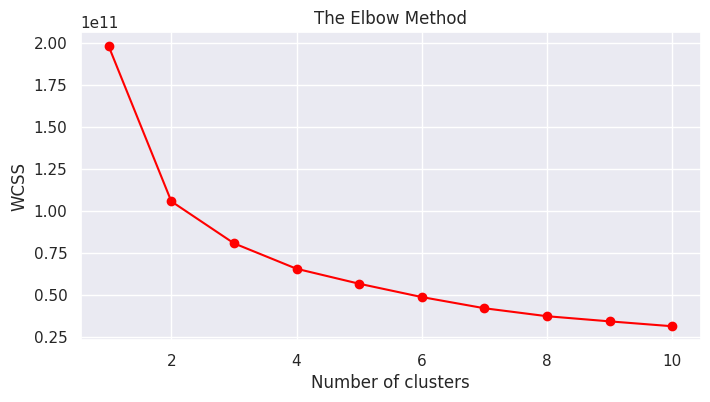

In [15]:
plt.figure(figsize=(8, 4)) 
plt.plot(clusters, wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Silhouette score

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
silhouette = {}

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(data_Clust)
    silhouette[k] = silhouette_score(data_Clust, kmeans.labels_)

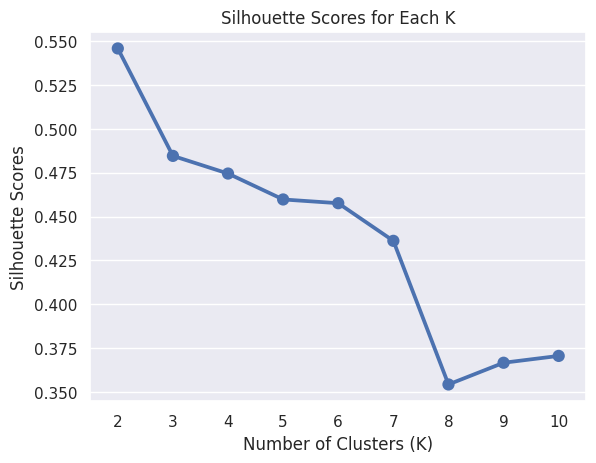

In [18]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

# Apply clustering on data with 6 clusters

In [19]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
credit_clusters = kmeans.fit_predict(data_Clust)

In [20]:
credit_clusters

array([1, 2, 2, ..., 1, 1, 1], dtype=int32)

In [21]:
centroids = kmeans.cluster_centers_

In [22]:
centroids

array([[ 1272.30901878,  2514.06160149, 11975.04655493],
       [  800.10363672,   494.95972811,  2066.95665681],
       [ 4384.52653259,   749.12460886,  6802.92605604],
       [  789.10099099,  1567.66860124,  6044.71563062],
       [ 5567.3199479 , 24696.7983871 , 15825.80645161],
       [ 8137.67038152,  1994.12331492, 12844.47513812]])

In [23]:
silhouette_score(data_Clust, credit_clusters)

0.4576050983693659

# Add cluster column to the original data

In [24]:
data_CC_kmean = data_CC.copy()

In [25]:
data_CC_kmean['Clusters_kmean'] = credit_clusters

In [26]:
data_CC_kmean

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters_kmean
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,"1,000.000",201.802,139.510,0.000,12,1
1,C10002,"3,202.467",0.909,0.000,0.000,0.000,"6,442.945",0.000,0.000,0.000,0.250,4,0,"7,000.000","4,103.033","1,072.340",0.222,12,2
2,C10003,"2,495.149",1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,"7,500.000",622.067,627.285,0.000,12,2
3,C10004,"1,666.671",0.636,"1,499.000","1,499.000",0.000,205.788,0.083,0.083,0.000,0.083,1,1,"7,500.000",0.000,864.207,0.000,12,3
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,"1,200.000",678.335,244.791,0.000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.494,1.000,291.120,0.000,291.120,0.000,1.000,0.000,0.833,0.000,0,6,"1,000.000",325.594,48.886,0.500,6,1
8946,C19187,19.183,1.000,300.000,0.000,300.000,0.000,1.000,0.000,0.833,0.000,0,6,"1,000.000",275.861,864.207,0.000,6,1
8947,C19188,23.399,0.833,144.400,0.000,144.400,0.000,0.833,0.000,0.667,0.000,0,5,"1,000.000",81.271,82.418,0.250,6,1
8948,C19189,13.458,0.833,0.000,0.000,0.000,36.559,0.000,0.000,0.000,0.167,2,0,500.000,52.550,55.756,0.250,6,1


# Visualizing the data

In [27]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data_CC_kmean["Clusters_kmean"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data_CC_kmean[data_CC_kmean["Clusters_kmean"]== i]['BALANCE'],
                                y = data_CC_kmean[data_CC_kmean["Clusters_kmean"] == i]['PURCHASES'],
                                z = data_CC_kmean[data_CC_kmean["Clusters_kmean"] == i]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 600, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))


In [28]:
import plotly.express as px
fig = plt.figure(figsize=(250,150))
fig = px.scatter_3d(data_CC_kmean, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', color='Clusters_kmean', symbol='TENURE')
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 
fig.show()

<Figure size 25000x15000 with 0 Axes>

# Data Analysis with visualization based on clusters

In [29]:
data_CC_kmean['Clusters_kmean'].value_counts()

Clusters_kmean
1    5186
3    1771
2    1060
0     541
5     361
4      31
Name: count, dtype: int64

In [30]:
data_CC_kmean.groupby(['Clusters_kmean']).max().sort_values(by='Clusters_kmean', ascending=False)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clusters_kmean,,,,,,,,,,,,,,,,,,
5,C18437,"18,495.559",1.000,"12,650.000","12,650.000","10,009.930","47,137.212",1.000,1.000,1.000,1.100,123,308,"22,000.000","40,627.595","76,406.208",0.429,12
4,C17237,"19,043.139",1.000,"49,039.570","40,761.250","22,500.000","19,513.475",1.000,1.000,1.000,0.667,35,358,"30,000.000","50,721.483","18,621.013",1.000,12
3,C19044,"4,007.029",1.000,"15,704.040","12,618.860","7,787.980","27,296.486",1.000,1.000,1.000,1.000,107,232,"9,100.000","34,107.075","8,296.913",1.000,12
2,C19182,"8,097.335",1.000,"9,030.080","7,311.990","6,508.080","26,268.700",1.000,1.000,1.000,1.500,110,309,"11,000.000","25,203.913","56,370.041",0.250,12
1,C19190,"3,676.070",1.000,"8,591.310","8,053.950","4,249.920","14,127.467",1.000,1.000,1.000,1.167,123,186,"4,250.000","22,099.478","38,512.125",1.000,12
0,C19098,"5,383.084",1.000,"14,454.980","11,994.710","12,541.000","17,278.539",1.000,1.000,1.000,0.917,56,274,"30,000.000","31,698.419","17,862.558",1.000,12


<Axes: xlabel='Clusters_kmean', ylabel='count'>

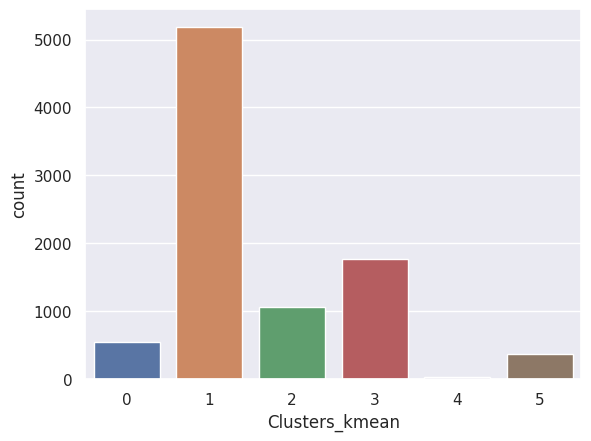

In [31]:
sns.countplot(data=data_CC_kmean, x='Clusters_kmean')

<Axes: ylabel='count'>

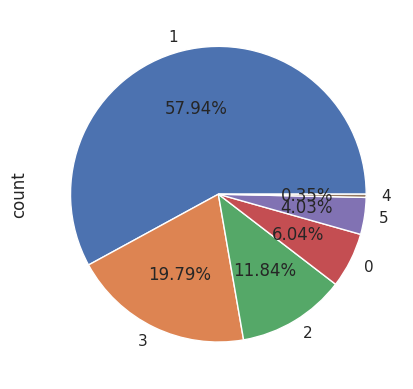

In [32]:
data_CC_kmean['Clusters_kmean'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='Clusters_kmean', ylabel='CREDIT_LIMIT'>

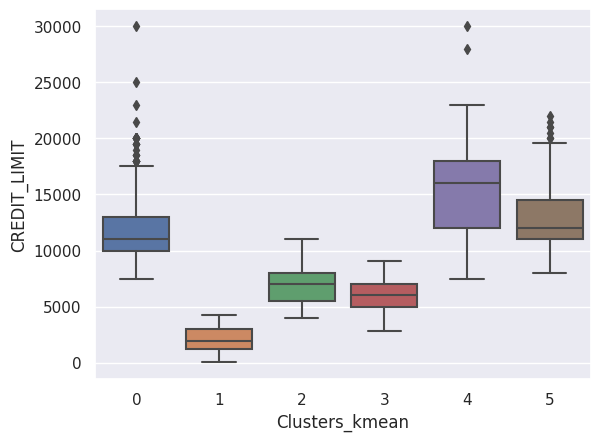

In [33]:
sns.boxplot(data=data_CC_kmean, x='Clusters_kmean',y='CREDIT_LIMIT')

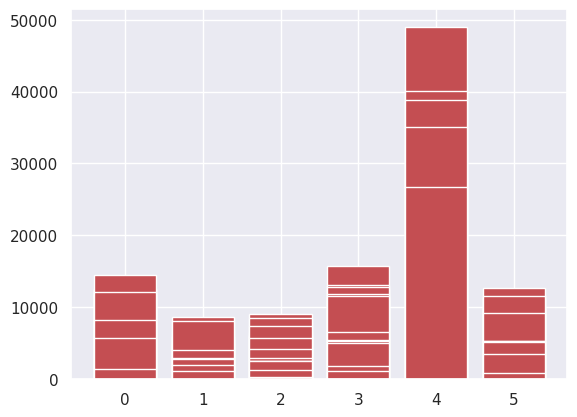

In [34]:
plt.bar(x='Clusters_kmean', height='PURCHASES', data=data_CC_kmean , color= 'r')
plt.show()

# Apply Hierarchical Clustering

In [35]:
import scipy.cluster.hierarchy as sch

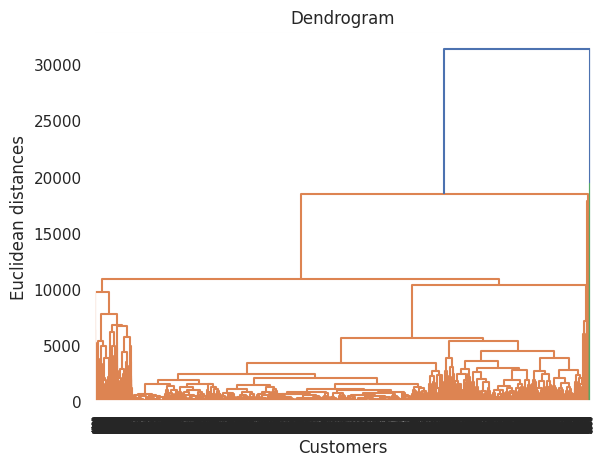

In [36]:
dendrogram = sch.dendrogram(sch.linkage(data_Clust, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=90)
plt.show()

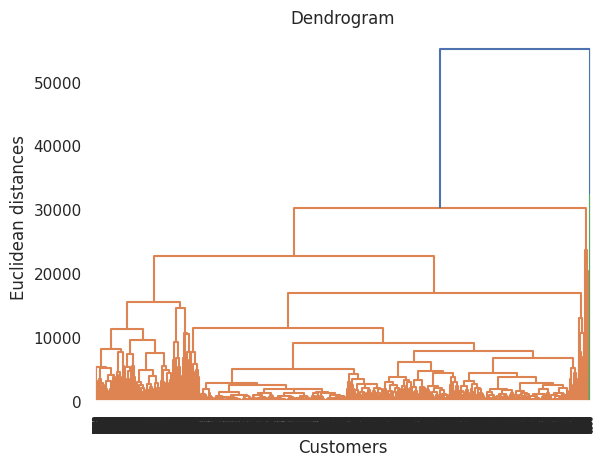

In [37]:
dendrogram = sch.dendrogram(sch.linkage(data_Clust, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=90)
plt.show()

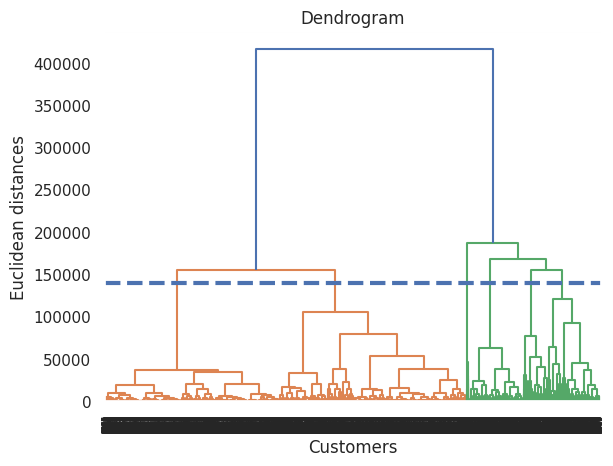

In [38]:
dendrogram = sch.dendrogram(sch.linkage(data_Clust, method = 'ward'))
plt.hlines(y=140000,xmin=0,xmax=100000,lw=3,linestyles='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=90)
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
credit_clusters_hc = hc.fit_predict(data_Clust)

In [40]:
credit_clusters_hc

array([5, 3, 3, ..., 5, 5, 5])

In [41]:
silhouette_score(data_Clust, credit_clusters_hc)

0.29532946869610777

# Add cluster column to the original data

In [42]:
data_CC_hc = data_CC.copy()

In [43]:
data_CC_hc['Clusters_hc'] = credit_clusters_hc

In [44]:
data_CC_hc

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters_hc
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,"1,000.000",201.802,139.510,0.000,12,5
1,C10002,"3,202.467",0.909,0.000,0.000,0.000,"6,442.945",0.000,0.000,0.000,0.250,4,0,"7,000.000","4,103.033","1,072.340",0.222,12,3
2,C10003,"2,495.149",1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,"7,500.000",622.067,627.285,0.000,12,3
3,C10004,"1,666.671",0.636,"1,499.000","1,499.000",0.000,205.788,0.083,0.083,0.000,0.083,1,1,"7,500.000",0.000,864.207,0.000,12,3
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,"1,200.000",678.335,244.791,0.000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.494,1.000,291.120,0.000,291.120,0.000,1.000,0.000,0.833,0.000,0,6,"1,000.000",325.594,48.886,0.500,6,5
8946,C19187,19.183,1.000,300.000,0.000,300.000,0.000,1.000,0.000,0.833,0.000,0,6,"1,000.000",275.861,864.207,0.000,6,5
8947,C19188,23.399,0.833,144.400,0.000,144.400,0.000,0.833,0.000,0.667,0.000,0,5,"1,000.000",81.271,82.418,0.250,6,5
8948,C19189,13.458,0.833,0.000,0.000,0.000,36.559,0.000,0.000,0.000,0.167,2,0,500.000,52.550,55.756,0.250,6,5


# Visualize Hierarchical Clustering

In [45]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data_CC_hc["Clusters_hc"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data_CC_hc[data_CC_hc["Clusters_hc"]== i]['BALANCE'],
                                y = data_CC_hc[data_CC_hc["Clusters_hc"] == i]['PURCHASES'],
                                z = data_CC_hc[data_CC_hc["Clusters_hc"] == i]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 600, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

# DBSCAN clustering

In [46]:
from sklearn.cluster import DBSCAN
DBS = DBSCAN(eps=1000, min_samples=6)
credit_clusters_DBS = DBS.fit(data_Clust)

In [47]:
credit_clusters_DBS

DBSCAN(eps=1000, min_samples=6)

In [48]:
credit_clusters_DBS.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
pd.unique(credit_clusters_DBS.labels_)

array([ 0, -1,  1,  2,  3,  5,  4,  6])

In [50]:
from collections import Counter
Counter(credit_clusters_DBS.labels_)

Counter({0: 8544, -1: 372, 2: 8, 4: 7, 5: 6, 1: 5, 3: 5, 6: 3})

# Add cluster column to the original data

In [51]:
data_CC_DBS = data_CC.copy()

In [52]:
data_CC_DBS['Clusters_DBS'] = credit_clusters_DBS.labels_

In [53]:
data_CC_DBS

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters_DBS
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,"1,000.000",201.802,139.510,0.000,12,0
1,C10002,"3,202.467",0.909,0.000,0.000,0.000,"6,442.945",0.000,0.000,0.000,0.250,4,0,"7,000.000","4,103.033","1,072.340",0.222,12,0
2,C10003,"2,495.149",1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,"7,500.000",622.067,627.285,0.000,12,0
3,C10004,"1,666.671",0.636,"1,499.000","1,499.000",0.000,205.788,0.083,0.083,0.000,0.083,1,1,"7,500.000",0.000,864.207,0.000,12,0
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,"1,200.000",678.335,244.791,0.000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.494,1.000,291.120,0.000,291.120,0.000,1.000,0.000,0.833,0.000,0,6,"1,000.000",325.594,48.886,0.500,6,0
8946,C19187,19.183,1.000,300.000,0.000,300.000,0.000,1.000,0.000,0.833,0.000,0,6,"1,000.000",275.861,864.207,0.000,6,0
8947,C19188,23.399,0.833,144.400,0.000,144.400,0.000,0.833,0.000,0.667,0.000,0,5,"1,000.000",81.271,82.418,0.250,6,0
8948,C19189,13.458,0.833,0.000,0.000,0.000,36.559,0.000,0.000,0.000,0.167,2,0,500.000,52.550,55.756,0.250,6,0


# Visualize DBSCAN

In [54]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data_CC_DBS["Clusters_DBS"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data_CC_DBS[data_CC_DBS["Clusters_DBS"]== i]['BALANCE'],
                                y = data_CC_DBS[data_CC_DBS["Clusters_DBS"] == i]['PURCHASES'],
                                z = data_CC_DBS[data_CC_DBS["Clusters_DBS"] == i]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 600, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))